## Assignment 2.4 - Random Forest
    Submitted by: 
    Amandeep Kaur (21044104)                                                                                   
    Bhupesh Dod (21046099)

## Import the Libraries

In [1]:
import numpy as nm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats
import timeit

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RF

## Import the Data

In [2]:
abalone_data = pd.read_csv("/Users/amandeepkaur/Desktop/ECE657A/Assignments /Assignment 2/ece657a-W23-asg2-datasets-jupyterdemo/abalone.csv",
names= ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 
'Viscera_weight','Shell_weight', 'Rings'])


wine_data1 = pd.read_csv("/Users/amandeepkaur/Desktop/ECE657A/Assignments /Assignment 2/ece657a-W23-asg2-datasets-jupyterdemo/winequality-red.csv",
 sep = ";")
wine_data1["colour"]=1
wine_data1 = wine_data1[list(('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'colour', 'quality'))]

wine_data2 = pd.read_csv("/Users/amandeepkaur/Desktop/ECE657A/Assignments /Assignment 2/ece657a-W23-asg2-datasets-jupyterdemo/winequality-white.csv",
sep = ";")
wine_data2["colour"]=0
wine_data2 = wine_data2[list(('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'colour', 'quality'))]

wine_data = pd.concat([wine_data1, wine_data2])

wine_data = wine_data.reset_index()

X_abalone = abalone_data.iloc[:, 1:-1]
y_abalone = abalone_data.iloc[:, -1]

X_wine = wine_data.iloc[:, :-1]
y_wine = wine_data.iloc[:, -1]

sc = StandardScaler()

## Random Forest

## Abalone Data

### Abalone Raw

In [3]:
X_abalone = abalone_data.iloc[:, 1:-1]
y_abalone = abalone_data.iloc[:, -1]

X_a_train_raw, X_a_test_raw, y_a_train_raw, y_a_test_raw = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_raw.iloc[:, :] = sc.fit_transform(X_a_train_raw.iloc[:, :])
X_a_test_raw.iloc[:, :] = sc.transform(X_a_test_raw.iloc[:, :])


# On Abalone Raw
rf = RF(random_state = 0)
X_a_train_raw = rf.fit(X_a_train_raw , y_a_train_raw)
y_a_pred_raw = rf.predict(X_a_test_raw)
print("Accuracy of Abalone Raw for default random forest values: %.2f" % (accuracy_score(y_a_pred_raw, y_a_test_raw)*100)+"%")


Accuracy of Abalone Raw for default random forest values: 23.54%


### Abalone PCA

In [4]:
X_a_train_pca, X_a_test_pca, y_a_train_pca, y_a_test_pca = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_pca = sc.fit_transform(X_a_train_pca)
X_a_test_pca = sc.transform(X_a_test_pca)

pca = PCA(0.95)
X_a_train_pca = pca.fit_transform(X_a_train_pca)
X_a_test_pca = pca.transform(X_a_test_pca)


# On Abalone PCA
X_a_train_pca = rf.fit(X_a_train_pca, y_a_train_pca)
y_a_pred_pca = rf.predict(X_a_test_pca)
print("Accuracy of Abalone PCA for default random forest values: %.2f" % (accuracy_score(y_a_pred_pca, y_a_test_pca)*100)+"%")

Accuracy of Abalone PCA for default random forest values: 20.00%


### Abalone LDA

In [5]:
X_a_train_lda, X_a_test_lda, y_a_train_lda, y_a_test_lda = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_lda = sc.fit_transform(X_a_train_lda)
X_a_test_lda = sc.transform(X_a_test_lda)

lda = LDA(n_components=4)
X_a_train_lda = lda.fit_transform(X_a_train_lda, y_a_train_lda)
X_a_test_lda = lda.transform(X_a_test_lda)

#On Abalone LDA

X_a_train_lda = rf.fit(X_a_train_lda, y_a_train_lda)
y_a_pred_lda = rf.predict(X_a_test_lda)
print("Accuracy of Abalone LDA for default random forest values: %.2f" % (accuracy_score(y_a_pred_lda, y_a_test_lda)*100)+"%")

Accuracy of Abalone LDA for default random forest values: 24.21%


## Using GridSearchCV

### Abalone Raw

In [6]:
X_abalone = abalone_data.iloc[:, 1:-1]
y_abalone = abalone_data.iloc[:, -1]

X_a_train_raw, X_a_test_raw, y_a_train_raw, y_a_test_raw = train_test_split(X_abalone, y_abalone, random_state= 100)


X_a_train_raw.iloc[:, :] = sc.fit_transform(X_a_train_raw.iloc[:, :])
X_a_test_raw.iloc[:, :] = sc.transform(X_a_test_raw.iloc[:, :])


param_grid = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
              'n_estimators' : [10,15,20,25,30,35,40,45,50]
             }

grid_a_raw = GridSearchCV(RF(), param_grid, refit= True, verbose=0)
grid_a_raw.fit(X_a_train_raw, y_a_train_raw)
print("Best Parameters for Abalone Raw Random forest are:" +str(grid_a_raw.best_params_))
results = pd.DataFrame(grid_a_raw.cv_results_)

Best Parameters for Abalone Raw Random forest are:{'max_depth': 9, 'n_estimators': 50}


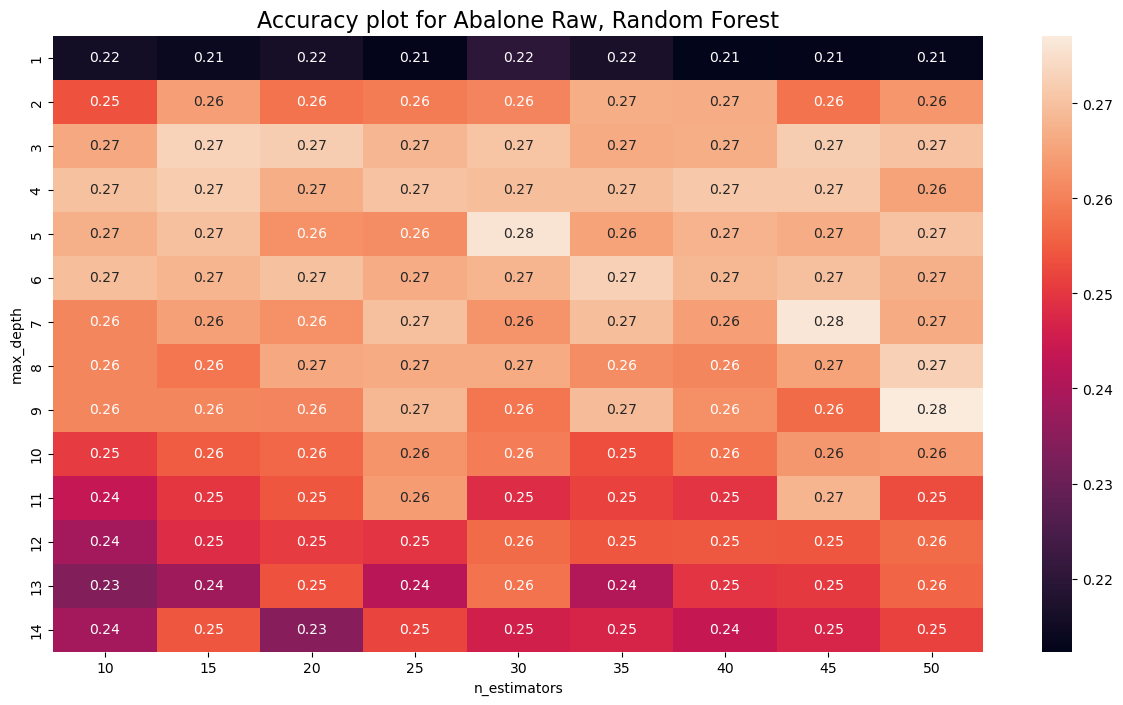

In [7]:
ac_df=pd.DataFrame(grid_a_raw.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=(grid_a_raw.cv_results_['mean_test_score'])
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Abalone Raw, Random Forest", fontsize = 16)
plt.show()

In [8]:
a=results.loc[results['rank_test_score'] == min(results['rank_test_score'])]

In [9]:
start_a_raw = timeit.default_timer()
random_forest = RF(max_depth = int(a['param_max_depth']),n_estimators = int(a['param_n_estimators']))
X_a_train_raw = random_forest.fit(X_a_train_raw , y_a_train_raw)
y_a_pred_raw = random_forest.predict(X_a_test_raw)
stop_a_raw = timeit.default_timer()

print('The best accuracy for Abalone Raw at parameter depth =', int(a['param_max_depth']),'and estimators =', int(a['param_n_estimators']) , "is : %.2f" %(accuracy_score(y_a_pred_raw, y_a_test_raw)*100), '%')
      
print('Time: %.3f' %(stop_a_raw - start_a_raw))
print('Runtime: %.3f' %(stop_a_raw - start_a_raw), 'sec')

The best accuracy for Abalone Raw at parameter depth = 9 and estimators = 50 is : 27.18 %
Time: 0.171
Runtime: 0.171 sec


### Abalone PCA

In [10]:
X_a_train_pca, X_a_test_pca, y_a_train_pca, y_a_test_pca = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_pca = sc.fit_transform(X_a_train_pca)
X_a_test_pca = sc.transform(X_a_test_pca)

pca = PCA(0.95)
X_a_train_pca = pca.fit_transform(X_a_train_pca)
X_a_test_pca = pca.transform(X_a_test_pca)


param_grid =  { 'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
              'n_estimators' : [10,15,20,25,30,35,40,45,50]}

grid = GridSearchCV(RF(), param_grid, refit= True, verbose=0)
grid.fit(X_a_train_pca, y_a_train_pca)
print("Best Parameters for Abalone PCA Random forest are:" +str(grid.best_params_)) 
results = pd.DataFrame(grid.cv_results_)

Best Parameters for Abalone PCA Random forest are:{'max_depth': 4, 'n_estimators': 40}


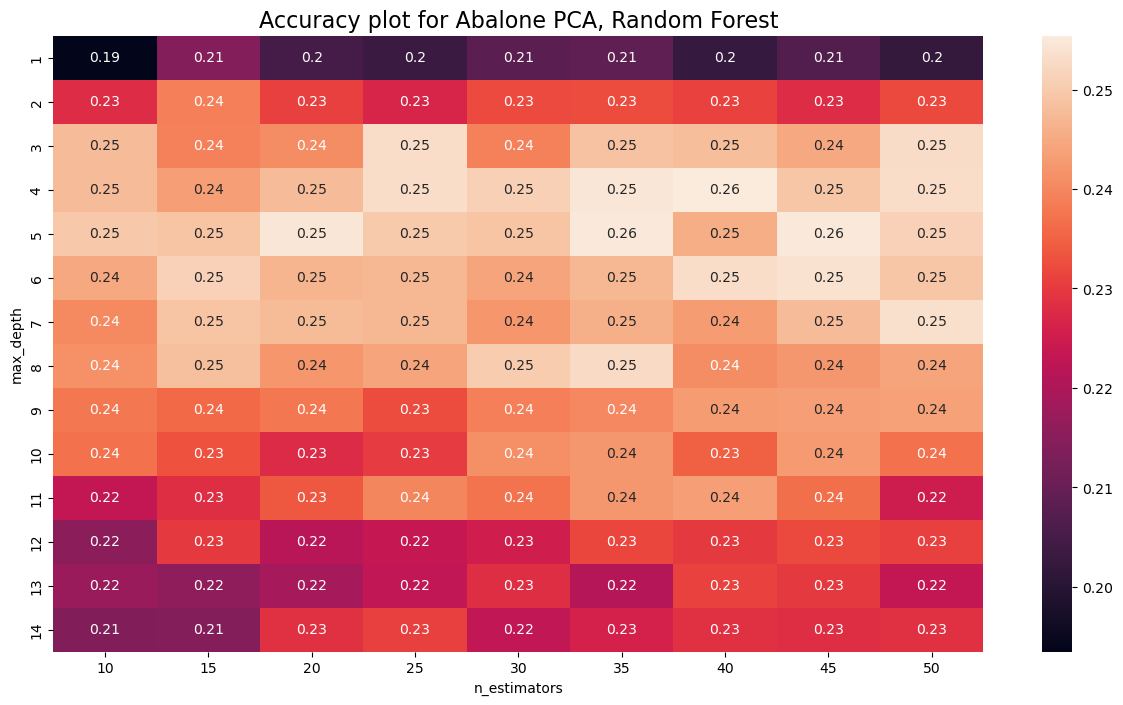

In [11]:
ac_df=pd.DataFrame(grid.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Abalone PCA, Random Forest", fontsize = 16)
plt.show()

In [12]:
a=results.loc[results['rank_test_score'] == min(results['rank_test_score'])]

In [13]:
start_a_pca = timeit.default_timer()
random_forest = RF(max_depth = int(a['param_max_depth']),n_estimators = int(a['param_n_estimators']))
X_a_train_pca = random_forest.fit(X_a_train_pca , y_a_train_pca)
y_a_pred_pca = random_forest.predict(X_a_test_pca)
stop_a_pca = timeit.default_timer()

print('Time: %.3f' %(stop_a_pca - start_a_pca))
print('Runtime: %.3f' %(stop_a_pca - start_a_pca), 'sec')

Time: 0.083
Runtime: 0.083 sec


In [14]:
print('The best accuracy for Abalone PCA at parameter depth =',  int(a['param_max_depth']),'and estimators =', int(a['param_n_estimators']) , "is : %.2f" %(accuracy_score(y_a_pred_pca, y_a_test_pca)*100), '%')

The best accuracy for Abalone PCA at parameter depth = 4 and estimators = 40 is : 26.79 %


### Abalone LDA

In [15]:
X_a_train_lda, X_a_test_lda, y_a_train_lda, y_a_test_lda = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_lda = sc.fit_transform(X_a_train_lda)
X_a_test_lda = sc.transform(X_a_test_lda)

lda = LDA(n_components=4)
X_a_train_lda = lda.fit_transform(X_a_train_lda, y_a_train_lda)
X_a_test_lda = lda.transform(X_a_test_lda)

param_grid = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
              'n_estimators' : [10,15,20,25,30,35,40,45,50]}

grid = GridSearchCV(RF(), param_grid, refit= True, verbose=0)
grid.fit(X_a_train_lda, y_a_train_lda)
print("Best Parameters for Abalone LDA Random forest are:" +str(grid.best_params_))
results = pd.DataFrame(grid.cv_results_)

Best Parameters for Abalone LDA Random forest are:{'max_depth': 6, 'n_estimators': 40}


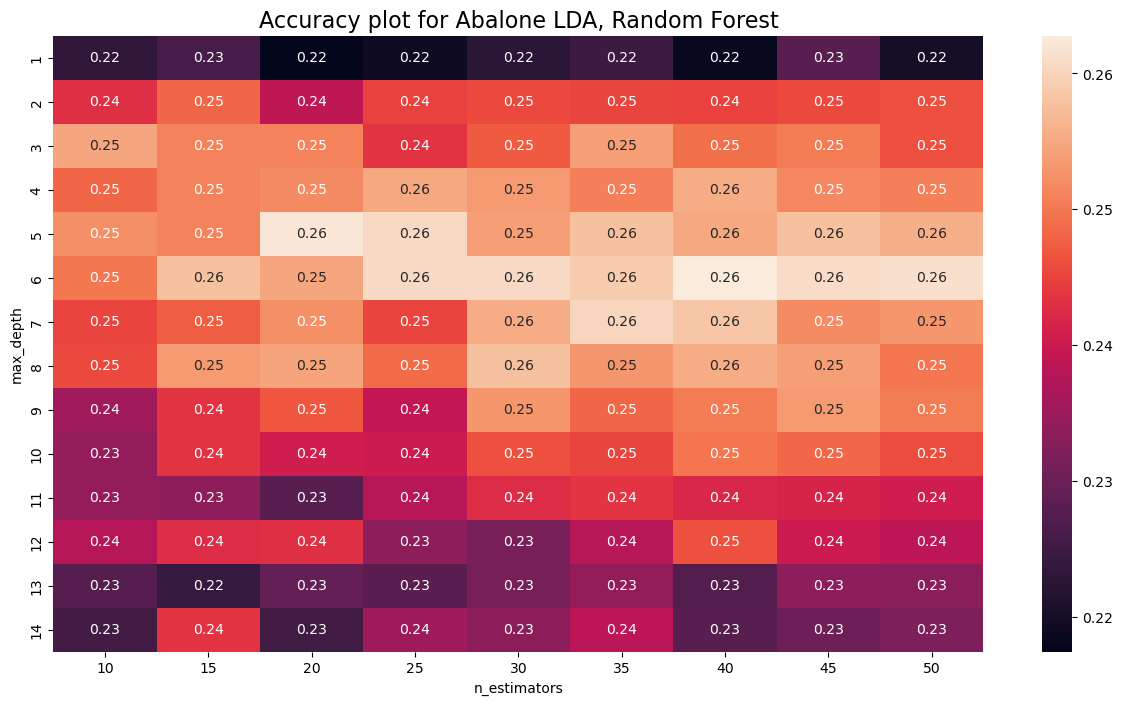

In [16]:
ac_df=pd.DataFrame(grid.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Abalone LDA, Random Forest", fontsize = 16)
plt.show()

In [17]:
a=results.loc[results['rank_test_score'] == min(results['rank_test_score'])]

In [18]:
start_a_lda = timeit.default_timer()
random_forest = RF(max_depth = int(a['param_max_depth']),n_estimators = int(a['param_n_estimators']))
X_a_train_lda = random_forest.fit(X_a_train_lda , y_a_train_lda)
y_a_pred_lda = random_forest.predict(X_a_test_lda)
stop_a_lda = timeit.default_timer()

print('Time: %.3f' %(stop_a_lda - start_a_lda))
print('Runtime: %.3f' %(stop_a_lda - start_a_lda), 'sec')

Time: 0.132
Runtime: 0.132 sec


In [19]:
print('The best accuracy for Abalone LDA at parameter depth =', int(a['param_max_depth']),'and estimators =', int(a['param_n_estimators']) , "is : %.2f" %(accuracy_score(y_a_pred_lda, y_a_test_lda)*100), '%')

The best accuracy for Abalone LDA at parameter depth = 6 and estimators = 40 is : 27.94 %


## Wine Data

### Wine Raw

In [20]:
X_w_train_raw, X_w_test_raw, y_w_train_raw, y_w_test_raw = train_test_split(X_wine, y_wine, random_state= 45)

X_w_train_raw.iloc[:, :-1] = sc.fit_transform(X_w_train_raw.iloc[:, :-1])
X_w_test_raw.iloc[:, :-1] = sc.transform(X_w_test_raw.iloc[:, :-1])


# On Wine Raw
dt = RF(random_state = 0)
X_w_train_raw = dt.fit(X_w_train_raw , y_w_train_raw)
y_w_pred_raw = dt.predict(X_w_test_raw)
print("Accuracy of Wine Raw for default random forest values: %.2f" % (accuracy_score(y_w_pred_raw, y_w_test_raw)*100)+"%")

Accuracy of Wine Raw for default random forest values: 68.49%


### Wine PCA

In [21]:
X_w_train_pca, X_w_test_pca, y_w_train_pca, y_w_test_pca = train_test_split(X_wine, y_wine, random_state= 45)


X_w_train_pca.iloc[:, :-1] = sc.fit_transform(X_w_train_pca.iloc[:, :-1])
X_w_test_pca.iloc[:, :-1] = sc.transform(X_w_test_pca.iloc[:, :-1])

pca = PCA(0.95)
X_w_train_pca = pca.fit_transform(X_w_train_pca)
X_w_test_pca = pca.transform(X_w_test_pca)


# On Wine PCA
X_w_train_pca = dt.fit(X_w_train_pca, y_w_train_pca)
y_w_pred_pca = dt.predict(X_w_test_pca)
print("Accuracy of Wine PCA for default random forest values: %.2f" % (accuracy_score(y_w_pred_pca, y_w_test_pca)*100)+"%")


Accuracy of Wine PCA for default random forest values: 67.82%


### Wine LDA

In [22]:
X_w_train_lda, X_w_test_lda, y_w_train_lda, y_w_test_lda = train_test_split(X_wine, y_wine, random_state= 45)

X_w_train_lda.iloc[:, :-1] = sc.fit_transform(X_w_train_lda.iloc[:, :-1])
X_w_test_lda.iloc[:, :-1] = sc.transform(X_w_test_lda.iloc[:, :-1])


lda = LDA(n_components=4)
X_w_train_lda = lda.fit_transform(X_w_train_lda, y_w_train_lda)
X_w_test_lda = lda.transform(X_w_test_lda)

#On Wine LDA

X_w_train_lda = dt.fit(X_w_train_lda, y_w_train_lda)
y_w_pred_lda = dt.predict(X_w_test_lda)
print("Accuracy of Wine LDA for default random forest values: %.2f" % (accuracy_score(y_w_pred_lda, y_w_test_lda)*100)+"%")

Accuracy of Wine LDA for default random forest values: 66.46%


## Using GridSearchCV

### Wine Raw

In [23]:
X_w_train_raw, X_w_test_raw, y_w_train_raw, y_w_test_raw = train_test_split(X_wine, y_wine, random_state= 100)


X_w_train_raw.iloc[:, :-1] = sc.fit_transform(X_w_train_raw.iloc[:, :-1])
X_w_test_raw.iloc[:, :-1] = sc.transform(X_w_test_raw.iloc[:, :-1])


param_grid = {'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
              'n_estimators' : [10,15,20,25,30,35,40,45,50]}

grid = GridSearchCV(RF(), param_grid, refit= True, verbose=0)
grid.fit(X_w_train_raw, y_w_train_raw)
print("Best Parameters for Wine Raw Random forest are:" +str(grid.best_params_)) 
results = pd.DataFrame(grid.cv_results_)

Best Parameters for Wine Raw Random forest are:{'max_depth': 14, 'n_estimators': 50}


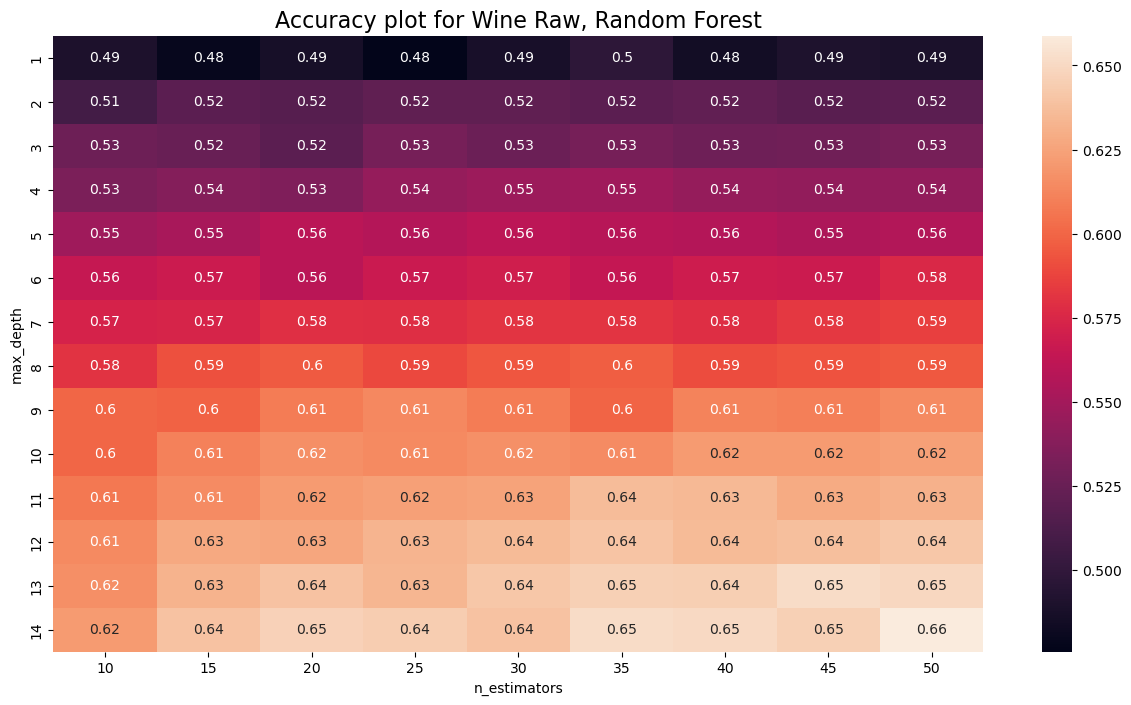

In [24]:
ac_df=pd.DataFrame(grid.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Wine Raw, Random Forest", fontsize = 16)
plt.show()

In [25]:
a=results.loc[results['rank_test_score'] == min(results['rank_test_score'])]

In [26]:
start_w_raw = timeit.default_timer()
random_forest = RF(max_depth = int(a['param_max_depth']),n_estimators = int(a['param_n_estimators']))
X_w_train_raw = random_forest.fit(X_w_train_raw , y_w_train_raw)
y_w_pred_raw = random_forest.predict(X_w_test_raw)
stop_w_raw = timeit.default_timer()

print('Time: %.3f' %(stop_w_raw - start_w_raw))
print('Runtime: %.3f' %(stop_w_raw - start_w_raw), 'sec')

Time: 0.347
Runtime: 0.347 sec


In [27]:
print('The best accuracy for Wine RAW at parameter depth =',  int(a['param_max_depth']),'and estimators =', int(a['param_n_estimators']) , "is : %.2f" %(accuracy_score(y_w_pred_raw, y_w_test_raw)*100), '%')

The best accuracy for Wine RAW at parameter depth = 14 and estimators = 50 is : 68.92 %


### Wine PCA

In [28]:
X_w_train_pca, X_w_test_pca, y_w_train_pca, y_w_test_pca = train_test_split(X_wine, y_wine, random_state= 45)


X_w_train_pca.iloc[:, :-1] = sc.fit_transform(X_w_train_pca.iloc[:, :-1])
X_w_test_pca.iloc[:, :-1] = sc.transform(X_w_test_pca.iloc[:, :-1])

pca = PCA(0.95)
X_w_train_pca = pca.fit_transform(X_w_train_pca)
X_w_test_pca = pca.transform(X_w_test_pca)

param_grid = {'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
              'n_estimators' : [10,15,20,25,30,35,40,45,50]}

grid = GridSearchCV(RF(), param_grid, refit= True, verbose=0)
grid.fit(X_w_train_pca, y_w_train_pca)
print("Best Parameters for Wine PCA Random forest are:" +str(grid.best_params_)) 
results = pd.DataFrame(grid.cv_results_)

Best Parameters for Wine PCA Random forest are:{'max_depth': 14, 'n_estimators': 50}


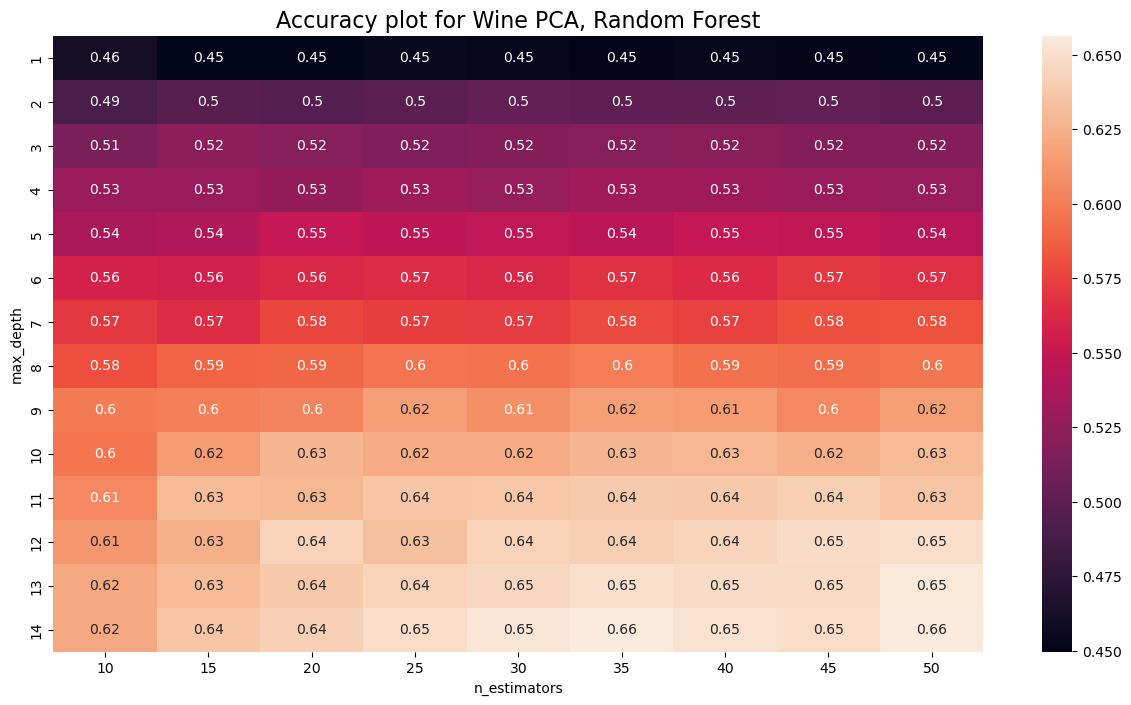

In [29]:
ac_df=pd.DataFrame(grid.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Wine PCA, Random Forest", fontsize = 16)
plt.show()

In [30]:
a=results.loc[results['rank_test_score'] == min(results['rank_test_score'])]

In [31]:
start_w_pca = timeit.default_timer()
random_forest = RF(max_depth = int(a['param_max_depth']),n_estimators = int(a['param_n_estimators']))
X_w_train_pca = random_forest.fit(X_w_train_pca , y_w_train_pca)
y_w_pred_pca = random_forest.predict(X_w_test_pca)
stop_w_pca = timeit.default_timer()

print('Time: %.3f' %(stop_w_pca - start_w_pca))
print('Runtime: %.3f' %(stop_w_pca - start_w_pca), 'sec')

Time: 0.525
Runtime: 0.525 sec


In [33]:
print('The best accuracy for Wine PCA at parameter depth =',  int(a['param_max_depth']),'and estimators =', int(a['param_n_estimators']) , "is : %.2f" %(accuracy_score(y_w_pred_pca, y_w_test_pca)*100), '%')

The best accuracy for Wine PCA at parameter depth = 14 and estimators = 50 is : 67.57 %


### Wine LDA

In [34]:
X_w_train_lda, X_w_test_lda, y_w_train_lda, y_w_test_lda = train_test_split(X_wine, y_wine, random_state= 45)


X_w_train_lda.iloc[:, :-1] = sc.fit_transform(X_w_train_lda.iloc[:, :-1])
X_w_test_lda.iloc[:, :-1] = sc.transform(X_w_test_lda.iloc[:, :-1])

lda = LDA(n_components=4)
X_w_train_lda = lda.fit_transform(X_w_train_lda, y_w_train_lda)
X_w_test_lda = lda.transform(X_w_test_lda)

param_grid = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
              'n_estimators' : [10,15,20,25,30,35,40,45,50]}

grid = GridSearchCV(RF(), param_grid, refit= True, verbose=0)
grid.fit(X_w_train_lda, y_w_train_lda)
print("Best Parameters for Wine LDA Random forest are:" +str(grid.best_params_)) 
results = pd.DataFrame(grid.cv_results_)

Best Parameters for Wine LDA Random forest are:{'max_depth': 14, 'n_estimators': 40}


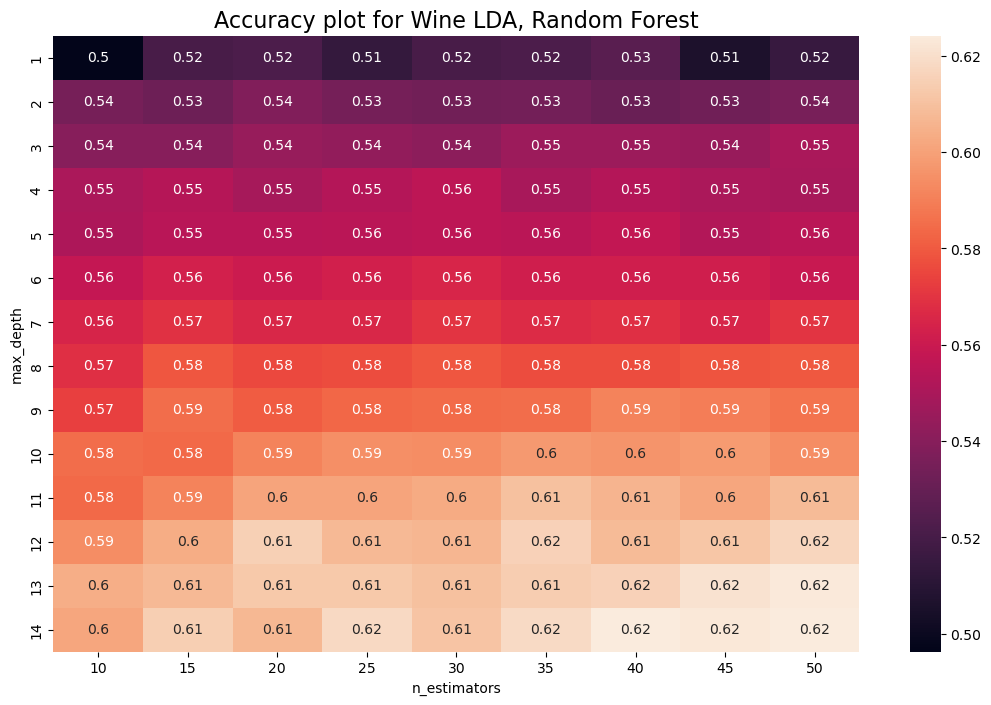

In [35]:
ac_df=pd.DataFrame(grid.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid.cv_results_['mean_test_score']
 
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
plt.figure(figsize=(13,8))
sns.heatmap(data=ac_df,annot=True)
plt.title("Accuracy plot for Wine LDA, Random Forest", fontsize = 16)
plt.show()

In [36]:
a=results.loc[results['rank_test_score'] == min(results['rank_test_score'])]

In [37]:
start_w_lda = timeit.default_timer()
random_forest = RF(max_depth = int(a['param_max_depth']),n_estimators = int(a['param_n_estimators']))
X_w_train_lda = random_forest.fit(X_w_train_lda , y_w_train_lda)
y_w_pred_lda = random_forest.predict(X_w_test_lda)
stop_w_lda = timeit.default_timer()

print('Time: %.3f' %(stop_w_lda - start_w_lda))
print('Runtime: %.3f' %(stop_w_lda - start_w_lda), 'sec')

Time: 0.299
Runtime: 0.299 sec


In [38]:
print('The best accuracy for Wine LDA at parameter depth =',  int(a['param_max_depth']),'and estimators =', int(a['param_n_estimators']) , "is : %.2f" %(accuracy_score(y_w_pred_lda, y_w_test_lda)*100), '%')

The best accuracy for Wine LDA at parameter depth = 14 and estimators = 40 is : 64.49 %
